In [94]:
import pandas as pd
import numpy as np
#import pandas_profiling
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from catboost import CatBoostRegressor, cv
from IPython.display import display
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, max_error

import tensorflow as tf

from tensorflow import keras
from keras.layers import Input, Dense, ReLU, Dropout
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from keras.models import Model 
from keras.utils import np_utils
from flask_ngrok import run_with_ngrok
from flask import Flask
import pickle

In [2]:
# Задаем рабочую папку
import os
os.chdir(r"C:\Users\Ckomap\Desktop\Вкр")

In [83]:
#Загрузим ранее полученные датафреймы
df = pd.read_csv('df.csv')
df_norm = pd.read_csv('df_norm.csv')
df_0 = pd.read_csv('df_0.csv')
df_1 = pd.read_csv('df_1.csv')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.162230,0.321894,0.698235,0.499322,0.0,0.275109,0.534939
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.162230,0.321894,0.698235,0.499322,0.0,0.344539,0.346256
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.162230,0.321894,0.698235,0.499322,0.0,0.344539,0.491397
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.162230,0.321894,0.698235,0.499322,0.0,0.344539,0.534939
4,0.604139,0.772842,0.861312,0.608021,0.418887,0.549664,0.782031,0.754989,0.342563,0.739306,0.0,0.483401,0.534939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.272501,0.683367,0.616274,0.869147,0.585397,0.451202,0.016390,0.577357,0.317909,0.649241,1.0,0.334252,0.790926
513,0.241590,0.564082,0.509192,0.448286,0.405565,0.425802,0.476135,0.817488,0.526985,0.536604,1.0,0.347907,0.532584
514,0.455435,0.529138,0.565962,0.694099,0.428655,0.436063,0.049973,0.193793,0.734705,0.528661,1.0,0.603973,0.538971
515,0.587163,0.650588,0.268550,0.712271,0.294428,0.350746,0.271207,0.480019,0.470745,0.192531,1.0,0.730963,0.444237


In [84]:
##Разобьем данные на тестовую и итоговую выборки 
#df_norm
x_norm = df_norm.drop((['Соотношение матрица-наполнитель', 'Кластер']), axis = 1)
y_norm = df_norm['Соотношение матрица-наполнитель']
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_norm,y_norm,test_size=0.3,random_state=42)
#df_0
x_0 = df_0.drop(('Соотношение матрица-наполнитель'), axis = 1)
y_0 = df_0['Соотношение матрица-наполнитель']
x_0_train, x_0_test, y_0_train, y_0_test = train_test_split(x_0,y_0,test_size=0.3,random_state=42)
#df_1
x_1 = df_1.drop(('Соотношение матрица-наполнитель'), axis = 1)
y_1 = df_1['Соотношение матрица-наполнитель']
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1,y_1,test_size=0.3,random_state=42)
xy_list = {'Полный датасет' : [x_norm_train, x_norm_test, y_norm_train, y_norm_test], 
           '0-й кластер' : [x_0_train, x_0_test, y_0_train, y_0_test],
           '1-й кластер' : [x_1_train, x_1_test, y_1_train, y_1_test],
          }

In [87]:
# Многослойный персептрон
def perceptron(x_train, x_test, y_train, y_test):
    model = keras.Sequential()
    model.add(Dense(20, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    history = model.fit(x_train, y_train, epochs=300, validation_split = 0.1, verbose = 2)

    print(model.summary())
    # График ошибок
    plt.plot(history.history['mae'], 
             label='Средняя абсолютная ошибка на обучающей выборке')
    plt.plot(history.history['val_mae'], 
             label='Средняя абсолютная ошибка на проверочной выборке')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Средняя абсолютная ошибка')
    plt.legend()
    plt.show()

    # Ключевые параметры хвостовые значения
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()
    return model

Epoch 1/300
20/20 - 1s - loss: 0.2988 - mae: 0.5154 - val_loss: 0.2447 - val_mae: 0.4690 - 930ms/epoch - 46ms/step
Epoch 2/300
20/20 - 0s - loss: 0.2308 - mae: 0.4471 - val_loss: 0.2053 - val_mae: 0.4261 - 60ms/epoch - 3ms/step
Epoch 3/300
20/20 - 0s - loss: 0.1846 - mae: 0.3920 - val_loss: 0.1493 - val_mae: 0.3540 - 46ms/epoch - 2ms/step
Epoch 4/300
20/20 - 0s - loss: 0.1147 - mae: 0.2932 - val_loss: 0.0698 - val_mae: 0.2205 - 45ms/epoch - 2ms/step
Epoch 5/300
20/20 - 0s - loss: 0.0471 - mae: 0.1745 - val_loss: 0.0298 - val_mae: 0.1273 - 52ms/epoch - 3ms/step
Epoch 6/300
20/20 - 0s - loss: 0.0366 - mae: 0.1533 - val_loss: 0.0289 - val_mae: 0.1253 - 51ms/epoch - 3ms/step
Epoch 7/300
20/20 - 0s - loss: 0.0349 - mae: 0.1502 - val_loss: 0.0285 - val_mae: 0.1242 - 52ms/epoch - 3ms/step
Epoch 8/300
20/20 - 0s - loss: 0.0343 - mae: 0.1490 - val_loss: 0.0279 - val_mae: 0.1225 - 49ms/epoch - 2ms/step
Epoch 9/300
20/20 - 0s - loss: 0.0338 - mae: 0.1480 - val_loss: 0.0273 - val_mae: 0.1216 - 50m

Epoch 73/300
20/20 - 0s - loss: 0.0296 - mae: 0.1389 - val_loss: 0.0251 - val_mae: 0.1222 - 44ms/epoch - 2ms/step
Epoch 74/300
20/20 - 0s - loss: 0.0294 - mae: 0.1386 - val_loss: 0.0252 - val_mae: 0.1223 - 44ms/epoch - 2ms/step
Epoch 75/300
20/20 - 0s - loss: 0.0295 - mae: 0.1386 - val_loss: 0.0253 - val_mae: 0.1216 - 45ms/epoch - 2ms/step
Epoch 76/300
20/20 - 0s - loss: 0.0293 - mae: 0.1383 - val_loss: 0.0253 - val_mae: 0.1233 - 46ms/epoch - 2ms/step
Epoch 77/300
20/20 - 0s - loss: 0.0294 - mae: 0.1383 - val_loss: 0.0254 - val_mae: 0.1230 - 46ms/epoch - 2ms/step
Epoch 78/300
20/20 - 0s - loss: 0.0291 - mae: 0.1378 - val_loss: 0.0254 - val_mae: 0.1228 - 45ms/epoch - 2ms/step
Epoch 79/300
20/20 - 0s - loss: 0.0292 - mae: 0.1377 - val_loss: 0.0254 - val_mae: 0.1233 - 46ms/epoch - 2ms/step
Epoch 80/300
20/20 - 0s - loss: 0.0291 - mae: 0.1379 - val_loss: 0.0253 - val_mae: 0.1231 - 45ms/epoch - 2ms/step
Epoch 81/300
20/20 - 0s - loss: 0.0290 - mae: 0.1376 - val_loss: 0.0256 - val_mae: 0.123

Epoch 145/300
20/20 - 0s - loss: 0.0272 - mae: 0.1327 - val_loss: 0.0288 - val_mae: 0.1313 - 47ms/epoch - 2ms/step
Epoch 146/300
20/20 - 0s - loss: 0.0271 - mae: 0.1324 - val_loss: 0.0286 - val_mae: 0.1296 - 47ms/epoch - 2ms/step
Epoch 147/300
20/20 - 0s - loss: 0.0271 - mae: 0.1324 - val_loss: 0.0286 - val_mae: 0.1311 - 47ms/epoch - 2ms/step
Epoch 148/300
20/20 - 0s - loss: 0.0273 - mae: 0.1330 - val_loss: 0.0289 - val_mae: 0.1308 - 45ms/epoch - 2ms/step
Epoch 149/300
20/20 - 0s - loss: 0.0271 - mae: 0.1323 - val_loss: 0.0285 - val_mae: 0.1303 - 43ms/epoch - 2ms/step
Epoch 150/300
20/20 - 0s - loss: 0.0272 - mae: 0.1324 - val_loss: 0.0291 - val_mae: 0.1312 - 43ms/epoch - 2ms/step
Epoch 151/300
20/20 - 0s - loss: 0.0270 - mae: 0.1322 - val_loss: 0.0291 - val_mae: 0.1309 - 43ms/epoch - 2ms/step
Epoch 152/300
20/20 - 0s - loss: 0.0271 - mae: 0.1321 - val_loss: 0.0291 - val_mae: 0.1340 - 47ms/epoch - 2ms/step
Epoch 153/300
20/20 - 0s - loss: 0.0270 - mae: 0.1322 - val_loss: 0.0290 - val_m

Epoch 217/300
20/20 - 0s - loss: 0.0261 - mae: 0.1299 - val_loss: 0.0318 - val_mae: 0.1387 - 43ms/epoch - 2ms/step
Epoch 218/300
20/20 - 0s - loss: 0.0258 - mae: 0.1290 - val_loss: 0.0317 - val_mae: 0.1381 - 43ms/epoch - 2ms/step
Epoch 219/300
20/20 - 0s - loss: 0.0260 - mae: 0.1293 - val_loss: 0.0318 - val_mae: 0.1381 - 43ms/epoch - 2ms/step
Epoch 220/300
20/20 - 0s - loss: 0.0260 - mae: 0.1293 - val_loss: 0.0317 - val_mae: 0.1386 - 45ms/epoch - 2ms/step
Epoch 221/300
20/20 - 0s - loss: 0.0259 - mae: 0.1293 - val_loss: 0.0319 - val_mae: 0.1391 - 45ms/epoch - 2ms/step
Epoch 222/300
20/20 - 0s - loss: 0.0260 - mae: 0.1290 - val_loss: 0.0324 - val_mae: 0.1386 - 45ms/epoch - 2ms/step
Epoch 223/300
20/20 - 0s - loss: 0.0262 - mae: 0.1300 - val_loss: 0.0320 - val_mae: 0.1379 - 43ms/epoch - 2ms/step
Epoch 224/300
20/20 - 0s - loss: 0.0261 - mae: 0.1301 - val_loss: 0.0322 - val_mae: 0.1387 - 43ms/epoch - 2ms/step
Epoch 225/300
20/20 - 0s - loss: 0.0260 - mae: 0.1291 - val_loss: 0.0319 - val_m

Epoch 289/300
20/20 - 0s - loss: 0.0248 - mae: 0.1257 - val_loss: 0.0332 - val_mae: 0.1405 - 46ms/epoch - 2ms/step
Epoch 290/300
20/20 - 0s - loss: 0.0249 - mae: 0.1262 - val_loss: 0.0333 - val_mae: 0.1410 - 46ms/epoch - 2ms/step
Epoch 291/300
20/20 - 0s - loss: 0.0247 - mae: 0.1257 - val_loss: 0.0339 - val_mae: 0.1425 - 47ms/epoch - 2ms/step
Epoch 292/300
20/20 - 0s - loss: 0.0248 - mae: 0.1262 - val_loss: 0.0333 - val_mae: 0.1408 - 46ms/epoch - 2ms/step
Epoch 293/300
20/20 - 0s - loss: 0.0247 - mae: 0.1257 - val_loss: 0.0338 - val_mae: 0.1428 - 44ms/epoch - 2ms/step
Epoch 294/300
20/20 - 0s - loss: 0.0252 - mae: 0.1275 - val_loss: 0.0339 - val_mae: 0.1421 - 46ms/epoch - 2ms/step
Epoch 295/300
20/20 - 0s - loss: 0.0248 - mae: 0.1258 - val_loss: 0.0339 - val_mae: 0.1418 - 45ms/epoch - 2ms/step
Epoch 296/300
20/20 - 0s - loss: 0.0247 - mae: 0.1253 - val_loss: 0.0339 - val_mae: 0.1424 - 45ms/epoch - 2ms/step
Epoch 297/300
20/20 - 0s - loss: 0.0247 - mae: 0.1256 - val_loss: 0.0341 - val_m

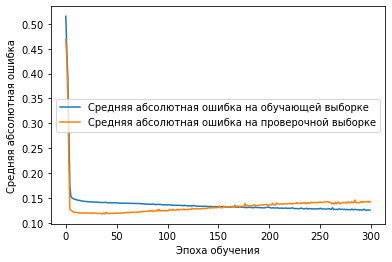

Epoch 1/300
20/20 - 1s - loss: 0.0491 - mae: 0.1792 - val_loss: 0.0319 - val_mae: 0.1387 - 916ms/epoch - 46ms/step
Epoch 2/300
20/20 - 0s - loss: 0.0431 - mae: 0.1682 - val_loss: 0.0297 - val_mae: 0.1327 - 47ms/epoch - 2ms/step
Epoch 3/300
20/20 - 0s - loss: 0.0401 - mae: 0.1621 - val_loss: 0.0280 - val_mae: 0.1248 - 43ms/epoch - 2ms/step
Epoch 4/300
20/20 - 0s - loss: 0.0388 - mae: 0.1595 - val_loss: 0.0269 - val_mae: 0.1226 - 45ms/epoch - 2ms/step
Epoch 5/300
20/20 - 0s - loss: 0.0368 - mae: 0.1555 - val_loss: 0.0264 - val_mae: 0.1213 - 46ms/epoch - 2ms/step
Epoch 6/300
20/20 - 0s - loss: 0.0365 - mae: 0.1543 - val_loss: 0.0250 - val_mae: 0.1163 - 45ms/epoch - 2ms/step
Epoch 7/300
20/20 - 0s - loss: 0.0352 - mae: 0.1515 - val_loss: 0.0245 - val_mae: 0.1152 - 48ms/epoch - 2ms/step
Epoch 8/300
20/20 - 0s - loss: 0.0345 - mae: 0.1498 - val_loss: 0.0255 - val_mae: 0.1211 - 50ms/epoch - 2ms/step
Epoch 9/300
20/20 - 0s - loss: 0.0341 - mae: 0.1491 - val_loss: 0.0237 - val_mae: 0.1124 - 50m

Epoch 73/300
20/20 - 0s - loss: 0.0281 - mae: 0.1344 - val_loss: 0.0234 - val_mae: 0.1160 - 47ms/epoch - 2ms/step
Epoch 74/300
20/20 - 0s - loss: 0.0285 - mae: 0.1351 - val_loss: 0.0235 - val_mae: 0.1172 - 46ms/epoch - 2ms/step
Epoch 75/300
20/20 - 0s - loss: 0.0283 - mae: 0.1348 - val_loss: 0.0237 - val_mae: 0.1201 - 45ms/epoch - 2ms/step
Epoch 76/300
20/20 - 0s - loss: 0.0279 - mae: 0.1334 - val_loss: 0.0241 - val_mae: 0.1215 - 44ms/epoch - 2ms/step
Epoch 77/300
20/20 - 0s - loss: 0.0279 - mae: 0.1335 - val_loss: 0.0233 - val_mae: 0.1162 - 44ms/epoch - 2ms/step
Epoch 78/300
20/20 - 0s - loss: 0.0275 - mae: 0.1324 - val_loss: 0.0237 - val_mae: 0.1148 - 45ms/epoch - 2ms/step
Epoch 79/300
20/20 - 0s - loss: 0.0281 - mae: 0.1339 - val_loss: 0.0236 - val_mae: 0.1151 - 45ms/epoch - 2ms/step
Epoch 80/300
20/20 - 0s - loss: 0.0276 - mae: 0.1332 - val_loss: 0.0234 - val_mae: 0.1160 - 41ms/epoch - 2ms/step
Epoch 81/300
20/20 - 0s - loss: 0.0279 - mae: 0.1348 - val_loss: 0.0241 - val_mae: 0.115

Epoch 145/300
20/20 - 0s - loss: 0.0261 - mae: 0.1298 - val_loss: 0.0248 - val_mae: 0.1248 - 45ms/epoch - 2ms/step
Epoch 146/300
20/20 - 0s - loss: 0.0262 - mae: 0.1297 - val_loss: 0.0257 - val_mae: 0.1277 - 43ms/epoch - 2ms/step
Epoch 147/300
20/20 - 0s - loss: 0.0259 - mae: 0.1293 - val_loss: 0.0248 - val_mae: 0.1237 - 45ms/epoch - 2ms/step
Epoch 148/300
20/20 - 0s - loss: 0.0259 - mae: 0.1284 - val_loss: 0.0246 - val_mae: 0.1227 - 46ms/epoch - 2ms/step
Epoch 149/300
20/20 - 0s - loss: 0.0259 - mae: 0.1287 - val_loss: 0.0250 - val_mae: 0.1250 - 44ms/epoch - 2ms/step
Epoch 150/300
20/20 - 0s - loss: 0.0259 - mae: 0.1280 - val_loss: 0.0264 - val_mae: 0.1302 - 43ms/epoch - 2ms/step
Epoch 151/300
20/20 - 0s - loss: 0.0262 - mae: 0.1285 - val_loss: 0.0257 - val_mae: 0.1275 - 46ms/epoch - 2ms/step
Epoch 152/300
20/20 - 0s - loss: 0.0259 - mae: 0.1276 - val_loss: 0.0250 - val_mae: 0.1225 - 45ms/epoch - 2ms/step
Epoch 153/300
20/20 - 0s - loss: 0.0260 - mae: 0.1291 - val_loss: 0.0246 - val_m

Epoch 217/300
20/20 - 0s - loss: 0.0254 - mae: 0.1272 - val_loss: 0.0277 - val_mae: 0.1333 - 48ms/epoch - 2ms/step
Epoch 218/300
20/20 - 0s - loss: 0.0255 - mae: 0.1274 - val_loss: 0.0284 - val_mae: 0.1352 - 44ms/epoch - 2ms/step
Epoch 219/300
20/20 - 0s - loss: 0.0257 - mae: 0.1279 - val_loss: 0.0301 - val_mae: 0.1435 - 45ms/epoch - 2ms/step
Epoch 220/300
20/20 - 0s - loss: 0.0259 - mae: 0.1279 - val_loss: 0.0264 - val_mae: 0.1289 - 46ms/epoch - 2ms/step
Epoch 221/300
20/20 - 0s - loss: 0.0247 - mae: 0.1251 - val_loss: 0.0266 - val_mae: 0.1249 - 43ms/epoch - 2ms/step
Epoch 222/300
20/20 - 0s - loss: 0.0249 - mae: 0.1249 - val_loss: 0.0273 - val_mae: 0.1309 - 49ms/epoch - 2ms/step
Epoch 223/300
20/20 - 0s - loss: 0.0249 - mae: 0.1260 - val_loss: 0.0274 - val_mae: 0.1309 - 45ms/epoch - 2ms/step
Epoch 224/300
20/20 - 0s - loss: 0.0246 - mae: 0.1249 - val_loss: 0.0263 - val_mae: 0.1247 - 48ms/epoch - 2ms/step
Epoch 225/300
20/20 - 0s - loss: 0.0248 - mae: 0.1251 - val_loss: 0.0272 - val_m

Epoch 289/300
20/20 - 0s - loss: 0.0241 - mae: 0.1239 - val_loss: 0.0286 - val_mae: 0.1291 - 45ms/epoch - 2ms/step
Epoch 290/300
20/20 - 0s - loss: 0.0241 - mae: 0.1234 - val_loss: 0.0283 - val_mae: 0.1262 - 45ms/epoch - 2ms/step
Epoch 291/300
20/20 - 0s - loss: 0.0236 - mae: 0.1220 - val_loss: 0.0288 - val_mae: 0.1312 - 46ms/epoch - 2ms/step
Epoch 292/300
20/20 - 0s - loss: 0.0238 - mae: 0.1228 - val_loss: 0.0283 - val_mae: 0.1276 - 45ms/epoch - 2ms/step
Epoch 293/300
20/20 - 0s - loss: 0.0239 - mae: 0.1233 - val_loss: 0.0282 - val_mae: 0.1299 - 45ms/epoch - 2ms/step
Epoch 294/300
20/20 - 0s - loss: 0.0237 - mae: 0.1222 - val_loss: 0.0284 - val_mae: 0.1274 - 43ms/epoch - 2ms/step
Epoch 295/300
20/20 - 0s - loss: 0.0241 - mae: 0.1229 - val_loss: 0.0289 - val_mae: 0.1275 - 44ms/epoch - 2ms/step
Epoch 296/300
20/20 - 0s - loss: 0.0242 - mae: 0.1236 - val_loss: 0.0288 - val_mae: 0.1272 - 43ms/epoch - 2ms/step
Epoch 297/300
20/20 - 0s - loss: 0.0243 - mae: 0.1242 - val_loss: 0.0281 - val_m

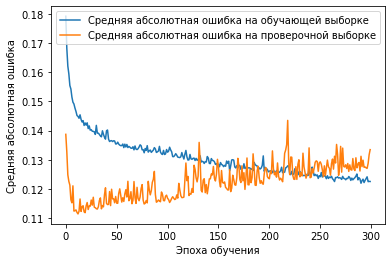

Epoch 1/300
20/20 - 1s - loss: 0.1335 - mae: 0.3114 - val_loss: 0.0444 - val_mae: 0.1688 - 789ms/epoch - 39ms/step
Epoch 2/300
20/20 - 0s - loss: 0.0391 - mae: 0.1579 - val_loss: 0.0315 - val_mae: 0.1423 - 47ms/epoch - 2ms/step
Epoch 3/300
20/20 - 0s - loss: 0.0358 - mae: 0.1511 - val_loss: 0.0283 - val_mae: 0.1333 - 59ms/epoch - 3ms/step
Epoch 4/300
20/20 - 0s - loss: 0.0338 - mae: 0.1474 - val_loss: 0.0278 - val_mae: 0.1313 - 50ms/epoch - 2ms/step
Epoch 5/300
20/20 - 0s - loss: 0.0330 - mae: 0.1455 - val_loss: 0.0275 - val_mae: 0.1304 - 44ms/epoch - 2ms/step
Epoch 6/300
20/20 - 0s - loss: 0.0325 - mae: 0.1443 - val_loss: 0.0272 - val_mae: 0.1289 - 51ms/epoch - 3ms/step
Epoch 7/300
20/20 - 0s - loss: 0.0321 - mae: 0.1435 - val_loss: 0.0271 - val_mae: 0.1284 - 45ms/epoch - 2ms/step
Epoch 8/300
20/20 - 0s - loss: 0.0317 - mae: 0.1423 - val_loss: 0.0271 - val_mae: 0.1284 - 48ms/epoch - 2ms/step
Epoch 9/300
20/20 - 0s - loss: 0.0315 - mae: 0.1419 - val_loss: 0.0270 - val_mae: 0.1278 - 50m

Epoch 73/300
20/20 - 0s - loss: 0.0262 - mae: 0.1288 - val_loss: 0.0295 - val_mae: 0.1310 - 46ms/epoch - 2ms/step
Epoch 74/300
20/20 - 0s - loss: 0.0265 - mae: 0.1293 - val_loss: 0.0295 - val_mae: 0.1312 - 45ms/epoch - 2ms/step
Epoch 75/300
20/20 - 0s - loss: 0.0262 - mae: 0.1288 - val_loss: 0.0292 - val_mae: 0.1300 - 44ms/epoch - 2ms/step
Epoch 76/300
20/20 - 0s - loss: 0.0262 - mae: 0.1285 - val_loss: 0.0304 - val_mae: 0.1320 - 43ms/epoch - 2ms/step
Epoch 77/300
20/20 - 0s - loss: 0.0262 - mae: 0.1287 - val_loss: 0.0297 - val_mae: 0.1308 - 46ms/epoch - 2ms/step
Epoch 78/300
20/20 - 0s - loss: 0.0261 - mae: 0.1285 - val_loss: 0.0302 - val_mae: 0.1322 - 50ms/epoch - 3ms/step
Epoch 79/300
20/20 - 0s - loss: 0.0269 - mae: 0.1303 - val_loss: 0.0312 - val_mae: 0.1335 - 41ms/epoch - 2ms/step
Epoch 80/300
20/20 - 0s - loss: 0.0261 - mae: 0.1278 - val_loss: 0.0300 - val_mae: 0.1315 - 46ms/epoch - 2ms/step
Epoch 81/300
20/20 - 0s - loss: 0.0260 - mae: 0.1280 - val_loss: 0.0305 - val_mae: 0.131

Epoch 145/300
20/20 - 0s - loss: 0.0236 - mae: 0.1211 - val_loss: 0.0350 - val_mae: 0.1393 - 45ms/epoch - 2ms/step
Epoch 146/300
20/20 - 0s - loss: 0.0234 - mae: 0.1211 - val_loss: 0.0359 - val_mae: 0.1374 - 43ms/epoch - 2ms/step
Epoch 147/300
20/20 - 0s - loss: 0.0236 - mae: 0.1209 - val_loss: 0.0348 - val_mae: 0.1373 - 45ms/epoch - 2ms/step
Epoch 148/300
20/20 - 0s - loss: 0.0236 - mae: 0.1213 - val_loss: 0.0351 - val_mae: 0.1411 - 46ms/epoch - 2ms/step
Epoch 149/300
20/20 - 0s - loss: 0.0235 - mae: 0.1212 - val_loss: 0.0354 - val_mae: 0.1424 - 46ms/epoch - 2ms/step
Epoch 150/300
20/20 - 0s - loss: 0.0237 - mae: 0.1214 - val_loss: 0.0361 - val_mae: 0.1382 - 44ms/epoch - 2ms/step
Epoch 151/300
20/20 - 0s - loss: 0.0236 - mae: 0.1217 - val_loss: 0.0357 - val_mae: 0.1380 - 48ms/epoch - 2ms/step
Epoch 152/300
20/20 - 0s - loss: 0.0240 - mae: 0.1215 - val_loss: 0.0361 - val_mae: 0.1442 - 44ms/epoch - 2ms/step
Epoch 153/300
20/20 - 0s - loss: 0.0237 - mae: 0.1220 - val_loss: 0.0357 - val_m

Epoch 217/300
20/20 - 0s - loss: 0.0232 - mae: 0.1214 - val_loss: 0.0384 - val_mae: 0.1435 - 42ms/epoch - 2ms/step
Epoch 218/300
20/20 - 0s - loss: 0.0221 - mae: 0.1172 - val_loss: 0.0393 - val_mae: 0.1453 - 44ms/epoch - 2ms/step
Epoch 219/300
20/20 - 0s - loss: 0.0220 - mae: 0.1176 - val_loss: 0.0390 - val_mae: 0.1444 - 46ms/epoch - 2ms/step
Epoch 220/300
20/20 - 0s - loss: 0.0223 - mae: 0.1175 - val_loss: 0.0399 - val_mae: 0.1456 - 44ms/epoch - 2ms/step
Epoch 221/300
20/20 - 0s - loss: 0.0225 - mae: 0.1180 - val_loss: 0.0391 - val_mae: 0.1447 - 46ms/epoch - 2ms/step
Epoch 222/300
20/20 - 0s - loss: 0.0222 - mae: 0.1176 - val_loss: 0.0387 - val_mae: 0.1436 - 44ms/epoch - 2ms/step
Epoch 223/300
20/20 - 0s - loss: 0.0227 - mae: 0.1187 - val_loss: 0.0389 - val_mae: 0.1457 - 44ms/epoch - 2ms/step
Epoch 224/300
20/20 - 0s - loss: 0.0224 - mae: 0.1185 - val_loss: 0.0394 - val_mae: 0.1453 - 47ms/epoch - 2ms/step
Epoch 225/300
20/20 - 0s - loss: 0.0222 - mae: 0.1178 - val_loss: 0.0390 - val_m

Epoch 289/300
20/20 - 0s - loss: 0.0209 - mae: 0.1145 - val_loss: 0.0421 - val_mae: 0.1513 - 41ms/epoch - 2ms/step
Epoch 290/300
20/20 - 0s - loss: 0.0212 - mae: 0.1149 - val_loss: 0.0429 - val_mae: 0.1505 - 51ms/epoch - 3ms/step
Epoch 291/300
20/20 - 0s - loss: 0.0210 - mae: 0.1139 - val_loss: 0.0432 - val_mae: 0.1510 - 45ms/epoch - 2ms/step
Epoch 292/300
20/20 - 0s - loss: 0.0206 - mae: 0.1129 - val_loss: 0.0446 - val_mae: 0.1533 - 43ms/epoch - 2ms/step
Epoch 293/300
20/20 - 0s - loss: 0.0214 - mae: 0.1154 - val_loss: 0.0435 - val_mae: 0.1522 - 47ms/epoch - 2ms/step
Epoch 294/300
20/20 - 0s - loss: 0.0209 - mae: 0.1133 - val_loss: 0.0425 - val_mae: 0.1510 - 48ms/epoch - 2ms/step
Epoch 295/300
20/20 - 0s - loss: 0.0208 - mae: 0.1149 - val_loss: 0.0442 - val_mae: 0.1541 - 47ms/epoch - 2ms/step
Epoch 296/300
20/20 - 0s - loss: 0.0212 - mae: 0.1146 - val_loss: 0.0435 - val_mae: 0.1535 - 46ms/epoch - 2ms/step
Epoch 297/300
20/20 - 0s - loss: 0.0213 - mae: 0.1143 - val_loss: 0.0435 - val_m

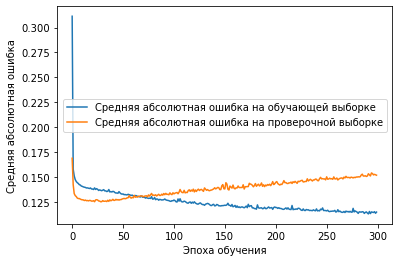

In [90]:
for i in xy_list:
    perceptron(*xy_list[i])

Epoch 1/300
20/20 - 1s - loss: 0.1630 - mae: 0.3579 - val_loss: 0.0891 - val_mae: 0.2557 - 790ms/epoch - 40ms/step
Epoch 2/300
20/20 - 0s - loss: 0.0662 - mae: 0.2114 - val_loss: 0.0343 - val_mae: 0.1363 - 48ms/epoch - 2ms/step
Epoch 3/300
20/20 - 0s - loss: 0.0375 - mae: 0.1561 - val_loss: 0.0309 - val_mae: 0.1364 - 43ms/epoch - 2ms/step
Epoch 4/300
20/20 - 0s - loss: 0.0354 - mae: 0.1524 - val_loss: 0.0290 - val_mae: 0.1296 - 44ms/epoch - 2ms/step
Epoch 5/300
20/20 - 0s - loss: 0.0333 - mae: 0.1479 - val_loss: 0.0284 - val_mae: 0.1273 - 45ms/epoch - 2ms/step
Epoch 6/300
20/20 - 0s - loss: 0.0322 - mae: 0.1453 - val_loss: 0.0285 - val_mae: 0.1282 - 44ms/epoch - 2ms/step
Epoch 7/300
20/20 - 0s - loss: 0.0319 - mae: 0.1442 - val_loss: 0.0285 - val_mae: 0.1297 - 48ms/epoch - 2ms/step
Epoch 8/300
20/20 - 0s - loss: 0.0318 - mae: 0.1441 - val_loss: 0.0283 - val_mae: 0.1292 - 47ms/epoch - 2ms/step
Epoch 9/300
20/20 - 0s - loss: 0.0316 - mae: 0.1438 - val_loss: 0.0281 - val_mae: 0.1283 - 46m

Epoch 73/300
20/20 - 0s - loss: 0.0281 - mae: 0.1351 - val_loss: 0.0265 - val_mae: 0.1262 - 43ms/epoch - 2ms/step
Epoch 74/300
20/20 - 0s - loss: 0.0280 - mae: 0.1350 - val_loss: 0.0267 - val_mae: 0.1263 - 45ms/epoch - 2ms/step
Epoch 75/300
20/20 - 0s - loss: 0.0281 - mae: 0.1355 - val_loss: 0.0268 - val_mae: 0.1270 - 43ms/epoch - 2ms/step
Epoch 76/300
20/20 - 0s - loss: 0.0281 - mae: 0.1352 - val_loss: 0.0268 - val_mae: 0.1271 - 43ms/epoch - 2ms/step
Epoch 77/300
20/20 - 0s - loss: 0.0278 - mae: 0.1346 - val_loss: 0.0271 - val_mae: 0.1264 - 45ms/epoch - 2ms/step
Epoch 78/300
20/20 - 0s - loss: 0.0279 - mae: 0.1348 - val_loss: 0.0270 - val_mae: 0.1286 - 45ms/epoch - 2ms/step
Epoch 79/300
20/20 - 0s - loss: 0.0281 - mae: 0.1352 - val_loss: 0.0278 - val_mae: 0.1261 - 44ms/epoch - 2ms/step
Epoch 80/300
20/20 - 0s - loss: 0.0283 - mae: 0.1361 - val_loss: 0.0270 - val_mae: 0.1277 - 46ms/epoch - 2ms/step
Epoch 81/300
20/20 - 0s - loss: 0.0278 - mae: 0.1344 - val_loss: 0.0267 - val_mae: 0.125

Epoch 145/300
20/20 - 0s - loss: 0.0257 - mae: 0.1289 - val_loss: 0.0289 - val_mae: 0.1326 - 44ms/epoch - 2ms/step
Epoch 146/300
20/20 - 0s - loss: 0.0257 - mae: 0.1293 - val_loss: 0.0290 - val_mae: 0.1336 - 43ms/epoch - 2ms/step
Epoch 147/300
20/20 - 0s - loss: 0.0256 - mae: 0.1284 - val_loss: 0.0290 - val_mae: 0.1338 - 46ms/epoch - 2ms/step
Epoch 148/300
20/20 - 0s - loss: 0.0255 - mae: 0.1282 - val_loss: 0.0293 - val_mae: 0.1348 - 47ms/epoch - 2ms/step
Epoch 149/300
20/20 - 0s - loss: 0.0255 - mae: 0.1283 - val_loss: 0.0292 - val_mae: 0.1334 - 46ms/epoch - 2ms/step
Epoch 150/300
20/20 - 0s - loss: 0.0258 - mae: 0.1287 - val_loss: 0.0291 - val_mae: 0.1326 - 58ms/epoch - 3ms/step
Epoch 151/300
20/20 - 0s - loss: 0.0253 - mae: 0.1283 - val_loss: 0.0298 - val_mae: 0.1368 - 48ms/epoch - 2ms/step
Epoch 152/300
20/20 - 0s - loss: 0.0256 - mae: 0.1282 - val_loss: 0.0293 - val_mae: 0.1353 - 47ms/epoch - 2ms/step
Epoch 153/300
20/20 - 0s - loss: 0.0255 - mae: 0.1286 - val_loss: 0.0292 - val_m

Epoch 217/300
20/20 - 0s - loss: 0.0238 - mae: 0.1236 - val_loss: 0.0304 - val_mae: 0.1391 - 49ms/epoch - 2ms/step
Epoch 218/300
20/20 - 0s - loss: 0.0240 - mae: 0.1239 - val_loss: 0.0313 - val_mae: 0.1413 - 44ms/epoch - 2ms/step
Epoch 219/300
20/20 - 0s - loss: 0.0240 - mae: 0.1246 - val_loss: 0.0309 - val_mae: 0.1417 - 46ms/epoch - 2ms/step
Epoch 220/300
20/20 - 0s - loss: 0.0236 - mae: 0.1234 - val_loss: 0.0304 - val_mae: 0.1408 - 40ms/epoch - 2ms/step
Epoch 221/300
20/20 - 0s - loss: 0.0238 - mae: 0.1236 - val_loss: 0.0300 - val_mae: 0.1382 - 50ms/epoch - 3ms/step
Epoch 222/300
20/20 - 0s - loss: 0.0235 - mae: 0.1224 - val_loss: 0.0305 - val_mae: 0.1406 - 50ms/epoch - 3ms/step
Epoch 223/300
20/20 - 0s - loss: 0.0237 - mae: 0.1230 - val_loss: 0.0303 - val_mae: 0.1402 - 50ms/epoch - 2ms/step
Epoch 224/300
20/20 - 0s - loss: 0.0234 - mae: 0.1226 - val_loss: 0.0303 - val_mae: 0.1391 - 48ms/epoch - 2ms/step
Epoch 225/300
20/20 - 0s - loss: 0.0233 - mae: 0.1220 - val_loss: 0.0303 - val_m

Epoch 289/300
20/20 - 0s - loss: 0.0217 - mae: 0.1170 - val_loss: 0.0312 - val_mae: 0.1407 - 49ms/epoch - 2ms/step
Epoch 290/300
20/20 - 0s - loss: 0.0216 - mae: 0.1167 - val_loss: 0.0313 - val_mae: 0.1412 - 49ms/epoch - 2ms/step
Epoch 291/300
20/20 - 0s - loss: 0.0214 - mae: 0.1159 - val_loss: 0.0311 - val_mae: 0.1410 - 40ms/epoch - 2ms/step
Epoch 292/300
20/20 - 0s - loss: 0.0217 - mae: 0.1171 - val_loss: 0.0313 - val_mae: 0.1413 - 52ms/epoch - 3ms/step
Epoch 293/300
20/20 - 0s - loss: 0.0215 - mae: 0.1172 - val_loss: 0.0314 - val_mae: 0.1413 - 47ms/epoch - 2ms/step
Epoch 294/300
20/20 - 0s - loss: 0.0212 - mae: 0.1156 - val_loss: 0.0309 - val_mae: 0.1399 - 45ms/epoch - 2ms/step
Epoch 295/300
20/20 - 0s - loss: 0.0213 - mae: 0.1161 - val_loss: 0.0310 - val_mae: 0.1408 - 46ms/epoch - 2ms/step
Epoch 296/300
20/20 - 0s - loss: 0.0213 - mae: 0.1157 - val_loss: 0.0306 - val_mae: 0.1395 - 43ms/epoch - 2ms/step
Epoch 297/300
20/20 - 0s - loss: 0.0215 - mae: 0.1167 - val_loss: 0.0322 - val_m

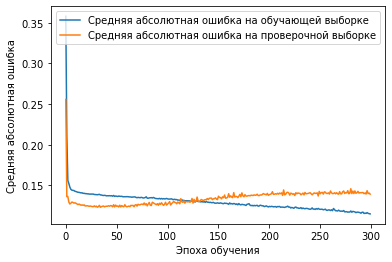

In [91]:
p_model = perceptron(*xy_list['Полный датасет'])

In [92]:
###Сохраним модель нейросети в отдельный файл
pickle.dump(p_model, open('p_model.pkl', 'wb'))
model_load = pickle.load(open('p_model.pkl', 'rb'))
model_load.predict(x_norm_test)  

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-29 02:52:45         1795
metadata.json                                  2023-03-29 02:52:45           64
variables.h5                                   2023-03-29 02:52:45        27360
Keras model archive loading:
File Name                                             Modified             Size
config.json                        

array([[0.46185765],
       [0.5528396 ],
       [0.6514951 ],
       [0.5947502 ],
       [0.5318598 ],
       [0.5624026 ],
       [0.5414871 ],
       [0.7473688 ],
       [0.5272784 ],
       [0.45470074],
       [0.5079579 ],
       [0.67250973],
       [0.4409613 ],
       [0.51773417],
       [0.59098417],
       [0.3076216 ],
       [0.62824345],
       [0.5307068 ],
       [0.512342  ],
       [0.23827025],
       [0.4574518 ],
       [0.2800347 ],
       [0.3862367 ],
       [0.46794903],
       [0.62013805],
       [0.60911155],
       [0.54178345],
       [0.5258682 ],
       [0.541575  ],
       [0.5937968 ],
       [0.52460796],
       [0.48188245],
       [0.475849  ],
       [0.62484026],
       [0.612252  ],
       [0.44666362],
       [0.434619  ],
       [0.45625806],
       [0.43380436],
       [0.47356156],
       [0.4335325 ],
       [0.463425  ],
       [0.5194211 ],
       [0.5286461 ],
       [0.4597225 ],
       [0.4438486 ],
       [0.53532153],
       [0.389

In [ ]:
##Приложение Flask
app = Flask(__name__)
@app.route('/', methods=['GET', 'POST'])
@app.route('/index', methods=['GET', 'POST'])
def main():
    if flask.request.method == 'GET':
        return render_template('main.html')

    if flask.request.method == 'POST':
        with open('p_model.pkl', 'rb') as f:
            loaded_model = pickle.load(f)
        exp = float(flask.request.form['Соотношение матрица-наполнитель'])
        y_pred = loaded_model.predict([[exp]])

        return render_template("main.html", result = y_pred)


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2023-03-29 02:58:20,560] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\Ckomap\AppDat